# 6a. Voronoi Decompositions

**1)** For this exercise, we ask you to make a modified Voronoi plot, analogous to the Voronoi code from Lecture 5c. 

Choose some points **Pts** in the plane randomly.  And choose a colour at random, one colour for every point, as in Lecture 5c.

Create a variant of the function **def voronoi(Pts, carr, res, norm=norm):** from Lecture 5c, where the colour associated to your grid of points (the image arrage **VDom**) is the colour associated to the **furthest** point of **Pts**.

In [4]:
from numpy.linalg import norm
import operator as op
import numpy as np
import itertools as it
import random as rd
import operator as op

import matplotlib.pyplot as plt
%matplotlib inline

Algorithm to generate Voronoi diagram with colour labeling closest point (lecture):
1. n = 20 points
2. Assign a colour array/matrix with dim(n, 3) 
3. For every element in the array:
    - Assign random floating point number
4. Getting rid of dim colors (?)
5. Voronoi function taking input (Pts, carr, res, norm = norm ):
    - Assign VDom: an multi-dimensional array with dim(res, res, 3)
    - For every pixels in the plot:
        - xy = each pixel
        - List DL: a list containing (point index, distance between the pixel and each generated point in Pts)
        - Sort the list from ascending order
        - VDom[j,i]: stores color for each pixel
    - plot the colours
    - plot the points

In [5]:
## random point uniform 
n = 20
Pts = np.ndarray( shape=(n, 2), dtype=np.float )
for i,j in it.product( range(n), range(2) ):
    Pts[i,j] = rd.random()
    
## color scheme
carr = np.ndarray( shape=(n,3), dtype=np.float )

for i,j in it.product( range(n), range(3) ):
    carr[i,j] = rd.random()
## get rid of dim colors as before
for i in range(n):
    delt = 1.0-max(carr[i])
    carr[i] = delt+carr[i] ## numpy increments all three elements

In [6]:
def voronoi(Pts, carr, res, norm=norm):
    '''
    Input: 
        Pts: Points
        carr: Colour array
        res:pixel resolution(?)
    Output:
        Voronoi diagram showing colour regions of the furthest point
    '''
    VDom = np.ndarray(shape=(res,res,3), dtype=np.float)
    for i,j in it.product( range(res), range(res) ):
        xy = np.array([i/res, j/res])
        ## list of pairs (index of pt k, distance from xy to pt[k])
        DL = [(k, norm(xy-Pts[k])) for k in range(n)]  # n = 20 from above
        DLS = sorted(DL, key=op.itemgetter(1))
        VDom[j,i] = carr[DLS[-1][0]]
    plt.imshow(VDom, extent=[0,1,0,1], origin='lower' )
    for k in range(n):
        plt.plot( Pts[k,0], Pts[k,1], 'ko',color=carr[k])

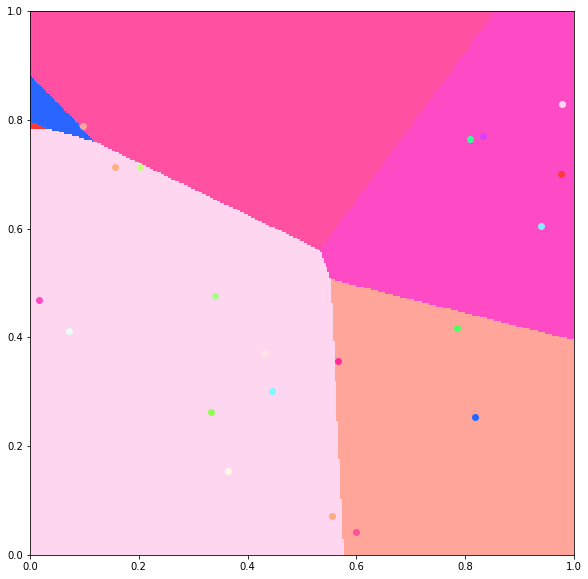

In [7]:
plt.figure(figsize=(10,10))
voronoi(Pts, carr, 300)

2) Repeat (1) but where the colour associated to your grid of points **VDom** is the **average** of the colours associated to the **nearest two points** of **Pts**.


In [81]:
def voronoi_avg(Pts, carr, res, norm=norm):
    '''
    Input: 
        Pts: Points
        carr: Colour array
        res:pixel resolution(?)
    Output:
        Voronoi diagram showing colour regions showing the average
    '''
    VDom = np.ndarray(shape=(res,res,3), dtype=np.float)
    for i,j in it.product( range(res), range(res) ):
        xy = np.array([i/res, j/res])
        ## list of pairs (index of pt k, distance from xy to pt[k])
        DL = [(k, norm(xy-Pts[k])) for k in range(n)]  # n = 20 from above
        DLS = sorted(DL, key=op.itemgetter(1))
        VDom[j,i] = (carr[DLS[0][0]] + carr[DLS[1][0]])/2 ## take the avg 
    plt.imshow(VDom, extent=[0,1,0,1], origin='lower' )
    for k in range(n):
        plt.plot( Pts[k,0], Pts[k,1], 'ko',color=carr[k])
        plt.plot( Pts[k,0], Pts[k,1], 'ko',color='red',markersize=0.7)

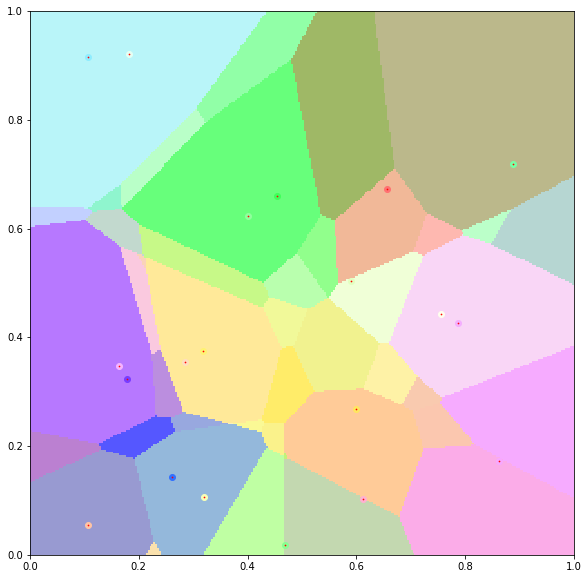

In [82]:
plt.figure(figsize=(10,10))
voronoi_avg(Pts, carr, 300)